# **Введение**

В данном блокноте представлены 3 лабораторные работы по теме "Кластерный анализ":
1. Иерархический кластерный анализ
2. k-means
3. DBSCAN

Лабораторные работы выполнены с использованием данных **"Экономика городов"**.
Данные описывают экономические условия в 48 городах мира в 1991 году.

City (Город): Название города


Работа (Work): Взвешенное среднее числа рабочих часов, сосчитанное по 12 профессиям


Цена (Price): Индекс цен 112 товаров и услуг, включая арендную плату за
жилье (значение для Цюриха взято за 100%)


Заработная плата (Salary): Индекс заработной платы за час работы,
сосчитанный по 12 профессиям после налогов и вычетов (значение для Цюриха взято за 100%)

# **1. Иерархический кластерный анализ**

In [ ]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

In [ ]:
df = pd.read_csv('Econom_Cities_data.csv', sep=';', index_col=0)
df

,Work,Price,Salary
City,,,
Amsterdam,1714,"65,6",49
Athens,1792,"53,8","30,4"
Bogota,2152,"37,9","11,5"
Bombay,2052,"30,3","5,3"
Brussels,1708,"73,8","50,5"
Buenos_Aires,1971,"56,1","12,5"
Cairo,-9999,"37,1",-9999
Caracas,2041,61,"10,9"
Chicago,1924,"73,9","61,9"


В данных есть выбросы (точнее, пропущенные значения) в строках с городами Cairo и Jakarta. Для дальнейшего анализа я решила их удалить, но вообще можно было бы заменить на средние или медианные значения.

In [ ]:
df = df.drop(index=['Cairo', 'Jakarta'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46 entries, Amsterdam to Zurich
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Work    46 non-null     int64 
 1   Price   46 non-null     object
 2   Salary  46 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.4+ KB


Заметим, что в данных в колонке с индексом цен и заработной платы присутствует тип данных object. Переведем их во float:

In [ ]:
df['Price'] = df['Price'].astype(str).str.replace(',', '.')
df['Price'] = df['Price'].astype(float)

df['Salary'] = df['Salary'].astype(str).str.replace(',', '.')
df['Salary'] = df['Salary'].astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46 entries, Amsterdam to Zurich
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Work    46 non-null     int64  
 1   Price   46 non-null     float64
 2   Salary  46 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.4+ KB


Так как наши данные не сопоставимы между собой, то стандартизируем их с помощью функции StandardScaler:

In [ ]:
from sklearn import preprocessing

stand_1 = preprocessing.StandardScaler()
stand_1.fit(df)
X = stand_1.transform(df)
X = pd.DataFrame(X, index=df.index, columns=df.columns)

In [ ]:
X.head()

,Work,Price,Salary
City,,,
Amsterdam,-0.962166,-0.212712,0.386095
Athens,-0.509827,-0.770489,-0.373488
Bogota,1.577891,-1.522069,-1.145323
Bombay,0.997969,-1.881316,-1.398517
Brussels,-0.996961,0.174896,0.447351


Теперь можно перейти к проведению иерархического кластерного анализа

In [ ]:
#  Активирую 3 процедуры иерархического кластерного анализа

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

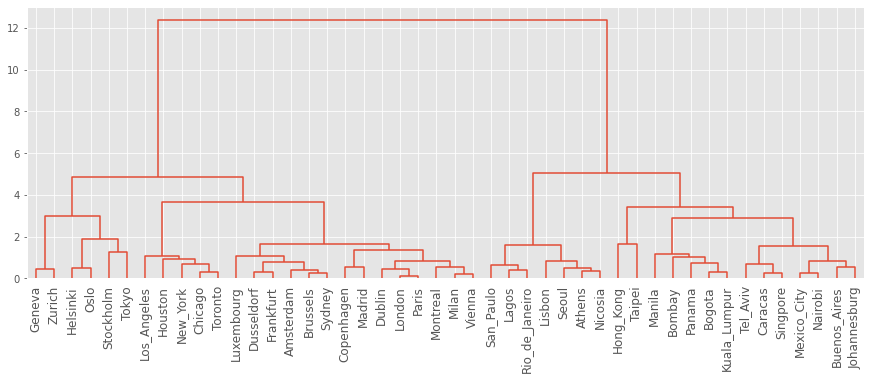

In [ ]:
#  Строю дендрограмму

link = linkage(X, 'ward', 'euclidean')
fig = plt.figure(figsize=(15, 5))
dn = dendrogram(link,
                labels=X.index.tolist(),
                color_threshold = -1,
                leaf_font_size = 12)

Определю оптимальное количество кластеров с помощью графика "Каменистая осыпь"

In [ ]:
dist = link[:, 2]
dist

array([ 0.13000932,  0.20992596,  0.24101549,  0.26638013,  0.27962161,
        0.28619313,  0.31145704,  0.31305006,  0.3489377 ,  0.38756772,
        0.419298  ,  0.44645167,  0.45306282,  0.4905399 ,  0.50930475,
        0.54142314,  0.54694673,  0.55560294,  0.6525312 ,  0.70695573,
        0.71322146,  0.73106836,  0.80923253,  0.81996004,  0.83440954,
        0.83591396,  0.92010068,  1.00797757,  1.07317494,  1.09798639,
        1.18557963,  1.2661125 ,  1.34552527,  1.5346713 ,  1.60218207,
        1.65009621,  1.67120837,  1.9067302 ,  2.91093293,  2.99369803,
        3.40166518,  3.65965497,  4.85967779,  5.06109685, 12.40027153])

Text(0, 0.5, 'Расстояние')

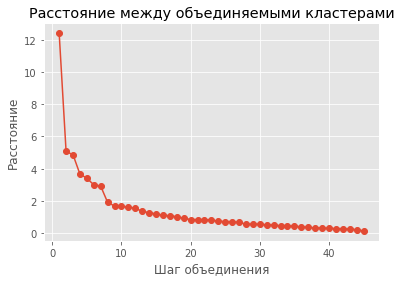

In [ ]:
dist_rev = dist[::-1]
idxs = range(1, len(dist) + 1)
plt.plot(idxs, dist_rev, marker='o')
plt.title('Расстояние между объединяемыми кластерами')
plt.xlabel('Шаг объединения')
plt.ylabel('Расстояние')

Определим, что у нас 3 кластера и выведем, в какой из кластеров попал каждый город

In [ ]:
df['cluster'] = fcluster(link, 5, criterion='distance')

In [ ]:
df['cluster'].sort_values()

City
Amsterdam         1
Toronto           1
Tokyo             1
Sydney            1
Stockholm         1
Paris             1
Oslo              1
New_York          1
Montreal          1
Milan             1
Madrid            1
Vienna            1
Los_Angeles       1
London            1
Houston           1
Luxembourg        1
Zurich            1
Brussels          1
Helsinki          1
Geneva            1
Frankfurt         1
Dusseldorf        1
Dublin            1
Copenhagen        1
Chicago           1
Athens            2
Seoul             2
San_Paulo         2
Rio_de_Janeiro    2
Nicosia           2
Lisbon            2
Lagos             2
Hong_Kong         3
Caracas           3
Panama            3
Buenos_Aires      3
Mexico_City       3
Manila            3
Singpore          3
Bombay            3
Taipei            3
Tel_Aviv          3
Bogota            3
Kuala_Lumpur      3
Nairobi           3
Johannesburg      3
Name: cluster, dtype: int32

In [ ]:
df.groupby('cluster').mean()

,Work,Price,Salary
cluster,,,
1,1789.240000,84.972000,59.032000
2,1798.857143,50.942857,19.214286
3,2082.357143,53.121429,14.914286


In [ ]:
df.groupby('cluster').size()

cluster
1    25
2     7
3    14
dtype: int64

Таким образом, в первый кластер попали наиболее экономически развитые города, во второй и третий - города с низкой заработной платой, также третий кластер отличается наибольшим количеством рабочих часов.

# **2. Метод к-средних (k-means)**

In [ ]:
#  Буду использовать процедуру KMeans из библиотеки sklearn

from sklearn.cluster import KMeans

Определю оптимальное количество кластеров с помощью графика "Каменистая осыпь"

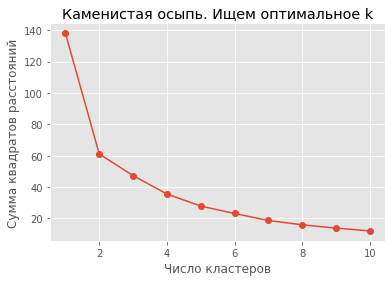

In [ ]:
K = range(1, 11)

# Вычисляем значения критерия качества для разного числа кластеров
models = [KMeans(n_clusters=k, random_state=42).fit(X) for k in K]
dist = [model.inertia_ for model in models]

# Строим график каменистая осыпь
plt.plot(K, dist, marker='o')
plt.xlabel('Число кластеров')
plt.ylabel('Сумма квадратов расстояний')
plt.title('Каменистая осыпь. Ищем оптимальное k')
plt.show()

Определю, что у нас 3 кластера. Строю модель:

In [ ]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(X)
df['cluster'] = model.labels_
df.groupby('cluster').mean()

,Work,Price,Salary
cluster,,,
0,2133.500000,54.170000,16.080000
1,1789.240000,84.972000,59.032000
2,1855.454545,50.781818,16.590909


In [ ]:
df.groupby('cluster').size()

cluster
0    10
1    25
2    11
dtype: int64

In [ ]:
#  Какие города попали в кластер 0?
df[df['cluster']==0].index.values

array(['Bogota', 'Bombay', 'Caracas', 'Hong_Kong', 'Kuala_Lumpur',
       'Manila', 'Panama', 'Singpore', 'Taipei', 'Tel_Aviv'], dtype=object)

In [ ]:
#  Какие города попали в кластер 1?
df[df['cluster']==1].index.values

array(['Amsterdam', 'Brussels', 'Chicago', 'Copenhagen', 'Dublin',
       'Dusseldorf', 'Frankfurt', 'Geneva', 'Helsinki', 'Houston',
       'London', 'Los_Angeles', 'Luxembourg', 'Madrid', 'Milan',
       'Montreal', 'New_York', 'Oslo', 'Paris', 'Stockholm', 'Sydney',
       'Tokyo', 'Toronto', 'Vienna', 'Zurich'], dtype=object)

In [ ]:
#  Какие города попали в кластер 2?
df[df['cluster']==2].index.values

array(['Athens', 'Buenos_Aires', 'Johannesburg', 'Lagos', 'Lisbon',
       'Mexico_City', 'Nairobi', 'Nicosia', 'Rio_de_Janeiro', 'San_Paulo',
       'Seoul'], dtype=object)

Таким образом, метод к-средих почти сошелся с иерархическим кластерным анализом. Кластер с наиболее благоприятными условиями труда не поменялся. Остальные два кластера отличаются теперь в большей степени количеством рабочих часов; заработная плата, в отличие от иерархического кластерного анализа, тут примерно одинаковая.

# **3. Кластеризация методом DBSCAN**

In [ ]:
from sklearn.cluster import DBSCAN

Начинаю перебирать разные значения радиуса и количества точек

In [ ]:
dbscan_1 = DBSCAN(eps=0.5, metric='euclidean', min_samples=5)

dbscan_1.fit(X)

unique, counts = np.unique(dbscan_1.labels_, return_counts=True)
print(np.asarray((unique, counts)).T)

[[-1 36]
 [ 0 10]]


Получилось 36 выбросов и 1 кластер. Перебираю дальше

In [ ]:
dbscan_1 = DBSCAN(eps=1, metric='euclidean', min_samples=7)

dbscan_1.fit(X)

unique, counts = np.unique(dbscan_1.labels_, return_counts=True)
print(np.asarray((unique, counts)).T)

[[-1  9]
 [ 0 19]
 [ 1 18]]


In [ ]:
dbscan_1 = DBSCAN(eps=1, metric='euclidean', min_samples=6)

dbscan_1.fit(X)

unique, counts = np.unique(dbscan_1.labels_, return_counts=True)
print(np.asarray((unique, counts)).T)

[[-1  9]
 [ 0 37]]


In [ ]:
dbscan_1 = DBSCAN(eps=0.9, metric='euclidean', min_samples=5)

dbscan_1.fit(X)

unique, counts = np.unique(dbscan_1.labels_, return_counts=True)
print(np.asarray((unique, counts)).T)

[[-1  8]
 [ 0 19]
 [ 1 19]]


Сделаю предположение, что в данном случае кластеризация методом DBSCAN не подходит.

# **Выводы**

Таким образом, были изучены и применены на практике 3 метода кластерного анализа. Иерархическая кластеризация лучше работает при небольших объёмах данных, в отличие от метода к-средних. Метод к-средних является достаточно быстрым, но при небольшом количестве кластеров может объединять не совсем схожие данные. Метод DBSCAN требует оптимального подбора двух параметров, что является более сложным, чем определение количества кластеров (как в двух предыдущих методах).